In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


# Importing Libraries


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Load the Data

In [4]:
df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv', encoding='ISO-8859-1')
print("Dataset Head:")
print(df.head(10))
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Dataset Head:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   15.6

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.8

# Data Visualization

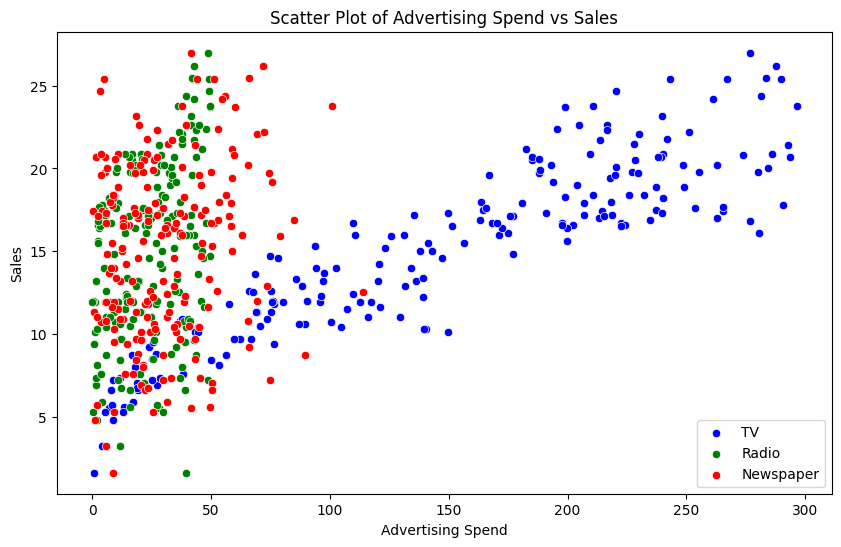

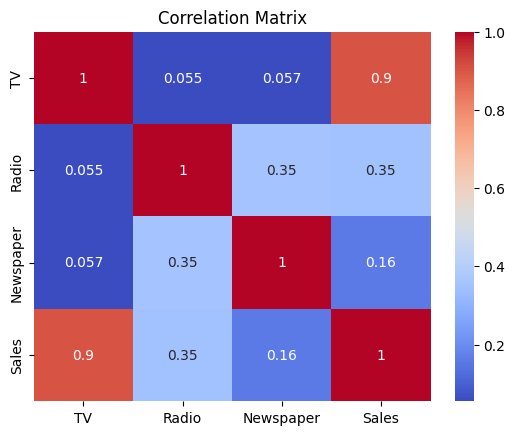

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df, color='blue', label='TV')
sns.scatterplot(x='Radio', y='Sales', data=df, color='green', label='Radio')
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='red', label='Newspaper')
plt.title("Scatter Plot of Advertising Spend vs Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Prepare the Data for training since no Dirty data


In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train the model

In [8]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Actual model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

# Result

In [11]:
y_predict = model.predict(X_test)

#First 10 results 
y_predict[:9]

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254])

# Errors or performance metrics 

In [14]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model Evaluation:
Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


# Result visualization

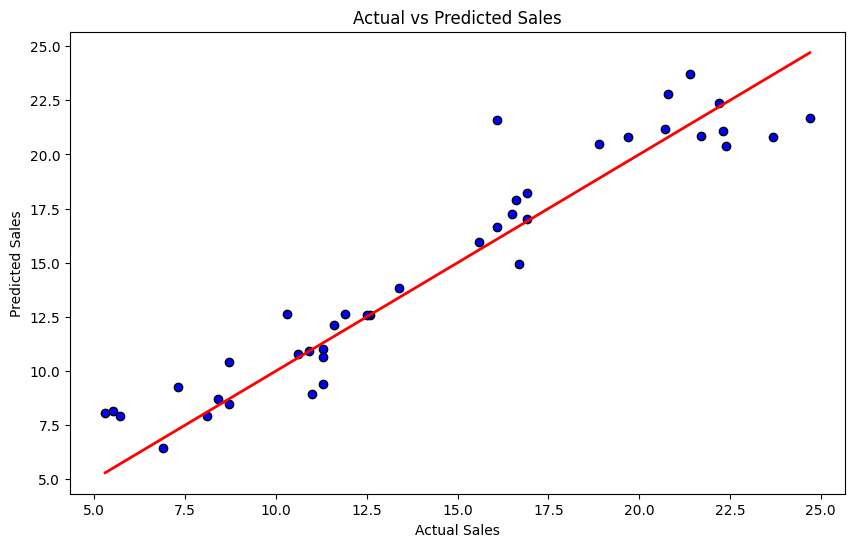

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# Feature importance

Feature Importance:
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


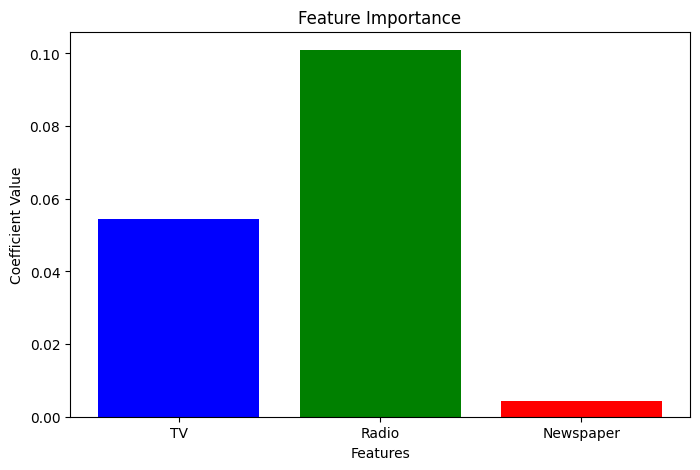

In [22]:
coefficients = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Coefficient': model.coef_
})

print("Feature Importance:")
print(coefficients)
plt.figure(figsize=(8, 5))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color=['blue', 'green', 'red'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Interactive visualization 

In [23]:
try:
    import plotly.express as px
    fig = px.scatter_3d(df, x='TV', y='Radio', z='Sales', color='Sales', size='Sales')
    fig.update_layout(scene=dict(
        xaxis_title='TV',
        yaxis_title='Radio',
        zaxis_title='Sales'
    ))
    fig.show()
except ImportError:
    print("Plotly is not installed. Skipping 3D visualization.")
